In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

# make plots bigger
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
from STalign import STalign as STa

In [7]:
df1 = pd.read_parquet('cells.parquet')
df2 = pd.read_parquet('cells2.parquet')

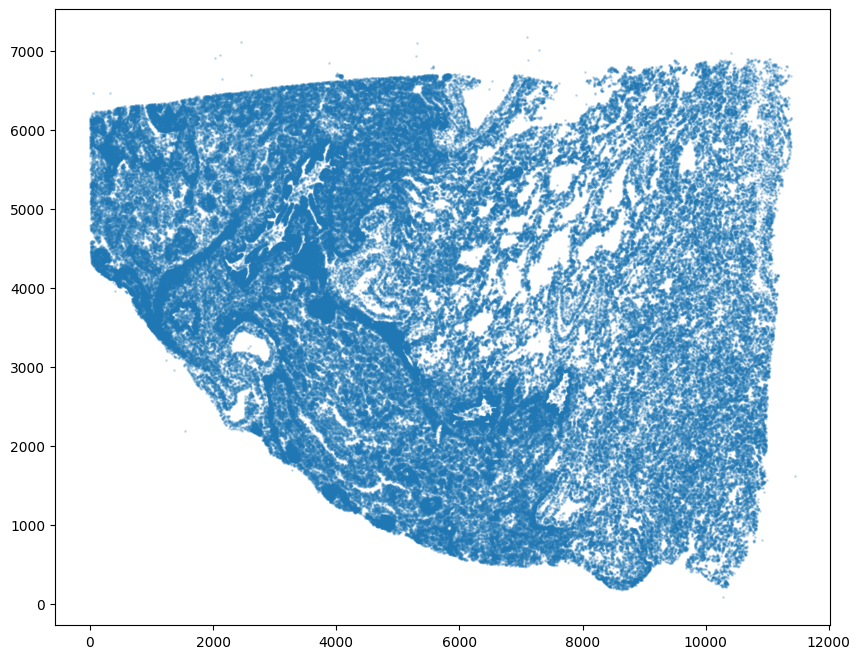

In [8]:
# get cell centroid coordinates
xI = np.array(df1['x_centroid'])
yI = np.array(df1['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)

0 of 278659
10000 of 278659
20000 of 278659
30000 of 278659
40000 of 278659
50000 of 278659
60000 of 278659
70000 of 278659
80000 of 278659
90000 of 278659
100000 of 278659
110000 of 278659
120000 of 278659
130000 of 278659
140000 of 278659
150000 of 278659
160000 of 278659
170000 of 278659
180000 of 278659
190000 of 278659
200000 of 278659
210000 of 278659
220000 of 278659
230000 of 278659
240000 of 278659
250000 of 278659
260000 of 278659
270000 of 278659
278658 of 278659


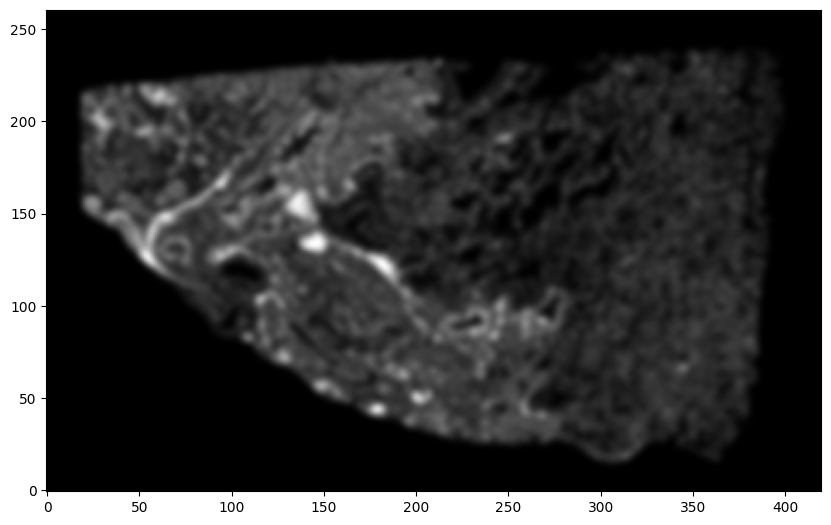

In [9]:
# rasterize at 30um resolution (assuming positions are in um units) and plot
XI,YI,I,fig = STa.rasterize(xI,yI,dx=30)

# plot
ax = fig.axes[0]
ax.invert_yaxis()

0 of 278328
10000 of 278328
20000 of 278328
30000 of 278328
40000 of 278328
50000 of 278328
60000 of 278328
70000 of 278328
80000 of 278328
90000 of 278328
100000 of 278328
110000 of 278328
120000 of 278328
130000 of 278328
140000 of 278328
150000 of 278328
160000 of 278328
170000 of 278328
180000 of 278328
190000 of 278328
200000 of 278328
210000 of 278328
220000 of 278328
230000 of 278328
240000 of 278328
250000 of 278328
260000 of 278328
270000 of 278328
278327 of 278328


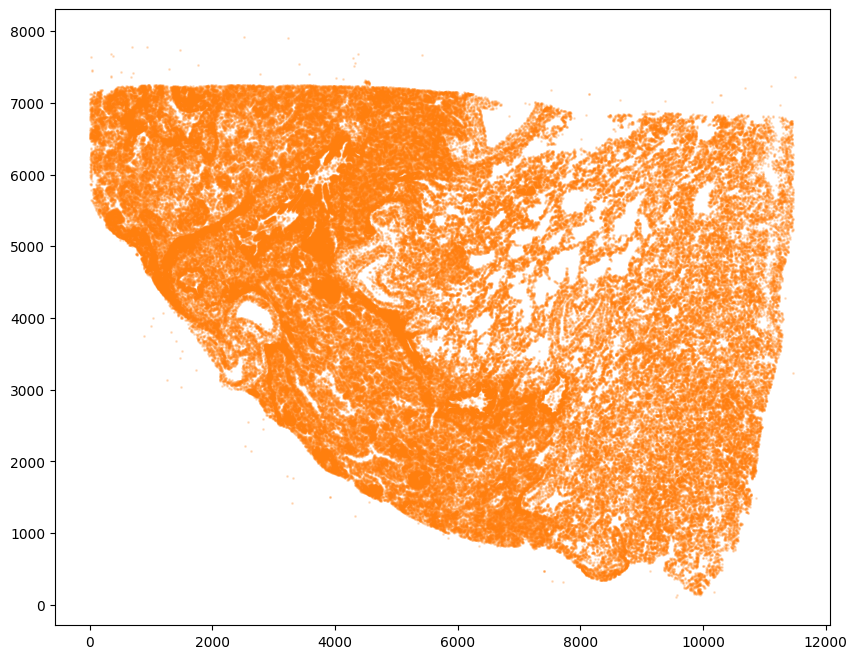

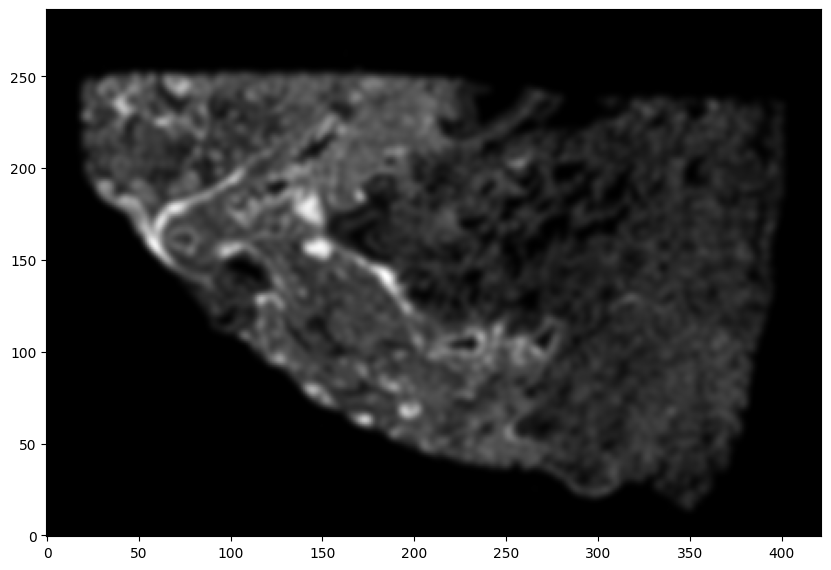

In [10]:
# get cell centroids
xJ = np.array(df2['x_centroid'])
yJ = np.array(df2['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=0.2,c='#ff7f0e')

# rasterize and plot
XJ,YJ,J,fig = STa.rasterize(xJ,yJ,dx=30)
ax = fig.axes[0]
ax.invert_yaxis()

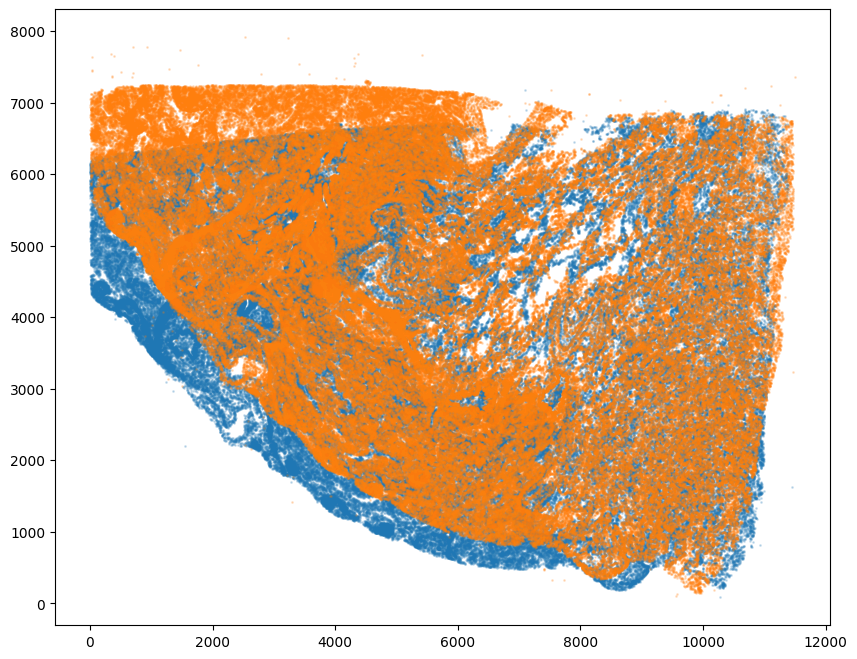

In [11]:
# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
ax.scatter(xJ,yJ,s=1,alpha=0.2)

In [12]:
# Optional: write out npz files for landmark point picker
# np.savez('Rep1', x=XI,y=YI,I=I)
# np.savez('Rep2', x=XJ,y=YJ,I=J)
# outputs Xenium_Breast_Cancer_Rep1.npz and Xenium_Breast_Cancer_Rep2.npz

In [13]:
# Run in terminal
# python point_annotator.py Rep1.npz Rep2.npz

In [14]:
# pointsI = [[3748.85025485, 3797.96118125],
#        [1096.0760613 , 4856.0902135 ],
#        [3540.20509356, 1055.76763286],
#        [2556.59219033, 6823.31601996],
#        [6192.9792871 , 1234.60634254],
#        [4777.17283549, 4364.28376189]]

# pointsJ = [[4396.186065033944, 3919.2816187520184],
#  [1670.8828392274936, 4682.9654897197615],
#  [4471.05703277588, 1193.9783929455698],
#  [2853.8441295500743, 6794.326780042342],
#  [7061.592516646848, 1673.152586493954],
#  [2288.3341258141318, 5809.896665116664]]

In [15]:
# read from file
pointsIlist = np.load('Rep1_points.npy', allow_pickle=True).tolist()
print(pointsIlist)
pointsJlist = np.load('Rep2_points.npy', allow_pickle=True).tolist()
print(pointsJlist)

{'0': [(3827.7676328585994, 3763.75348065284)], '1': [(4811.380536084406, 1125.8825129109064)], '2': [(3544.606342536018, 4419.495416136711)], '3': [(1055.7676328585994, 3599.817996781874)], '4': [(9803.961181245697, 1841.2373516205826)], '5': [(6912.735374794084, 5552.140577427035)], '6': [(1055.7676328585994, 5671.366383878647)], '7': [(6808.412794148923, 2571.4954161367114)]}
{'0': [(3934.2558123004055, 4411.160258582331)], '1': [(4667.991296171374, 1655.9086456791065)], '2': [(3739.591296171373, 5114.947355356526)], '3': [(1208.9525864939533, 4501.005419872654)], '4': [(9684.346134881049, 1850.573161808139)], '5': [(7168.68161875202, 5863.65703277588)], '6': [(1373.6687155262116, 6552.469936001686)], '7': [(6779.352586493955, 2898.7667101952356)]}


In [16]:
# convert to array
pointsI = []
pointsJ = []

# Jean's note: a bit odd to me that the points are stored as y,x
## instead of x,y but all downstream code uses this orientation
for i in pointsIlist.keys():
    pointsI.append([pointsIlist[i][0][1], pointsIlist[i][0][0]])
for i in pointsJlist.keys():
    pointsJ.append([pointsJlist[i][0][1], pointsJlist[i][0][0]])



In [17]:
pointsI = np.array(pointsI)
pointsJ = np.array(pointsJ)

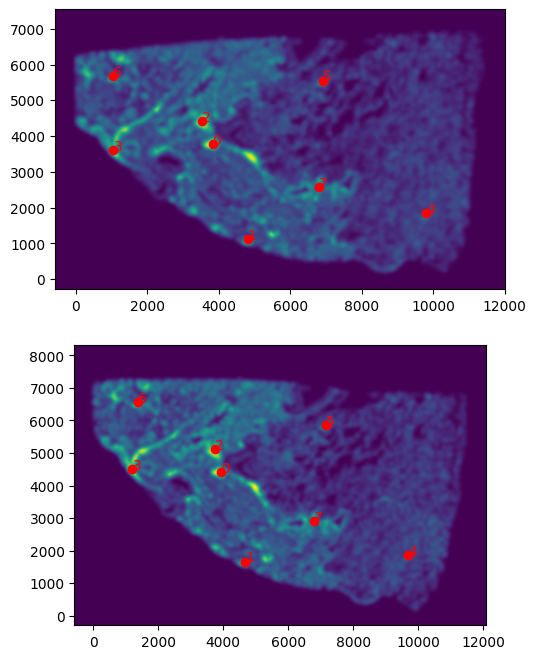

In [18]:
# get extent of images
extentI = STa.extent_from_x((YI,XI))
extentJ = STa.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(2,1)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI) # just want 201x276 matrix
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ) # just want 201x276 matrix
# with points
ax[0].scatter(pointsI[:,1], pointsI[:,0], c='red')
ax[1].scatter(pointsJ[:,1], pointsJ[:,0], c='red')
for i in range(pointsI.shape[0]):
    ax[0].text(pointsI[i,1],pointsI[i,0],f'{i}', c='red')
    ax[1].text(pointsJ[i,1],pointsJ[i,0],f'{i}', c='red')
ax[0].invert_yaxis()
ax[1].invert_yaxis()

In [20]:
if torch.cuda.is_available():
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')
# print(device)

In [21]:
L,T = STa.L_T_from_points(pointsI, pointsJ)
A = STa.to_A(torch.tensor(L),torch.tensor(T))

/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/torch/utils/_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


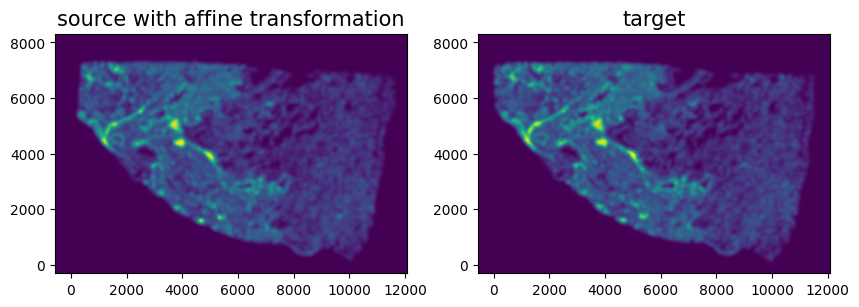

In [22]:
# compute initial affine transformation from points
AI = STa.transform_image_source_with_A(A, [YI,XI], I, [YJ,XJ])

#switch tensor from cuda to cpu for plotting with numpy
if AI.is_cuda:
    AI = AI.cpu()

fig,ax = plt.subplots(1,2)
ax[0].imshow((AI.permute(1,2,0).squeeze()), extent=extentJ)
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ)

ax[0].set_title('source with affine transformation', fontsize=15)
ax[1].set_title('target', fontsize=15)

ax[0].invert_yaxis()
ax[1].invert_yaxis()

/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/STalign/STalign.py:1301: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


CPU times: user 12min 20s, sys: 3.93 s, total: 12min 24s
Wall time: 6min 11s


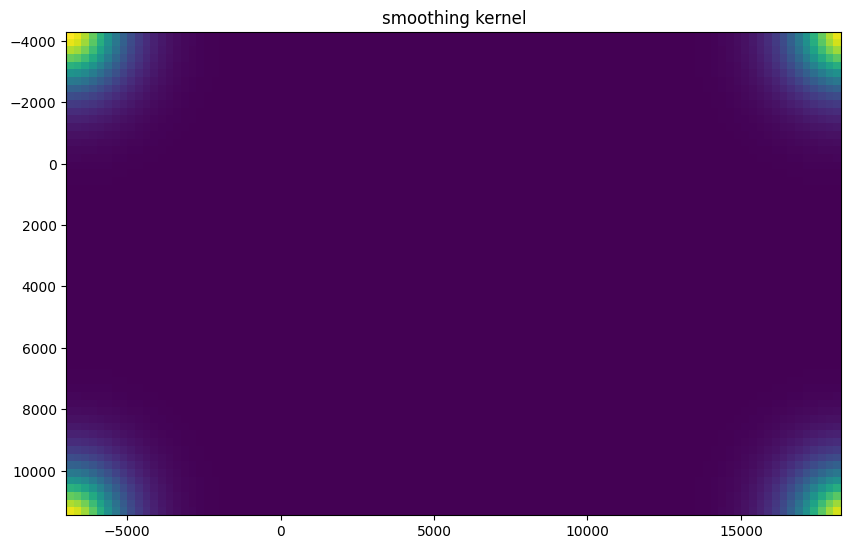

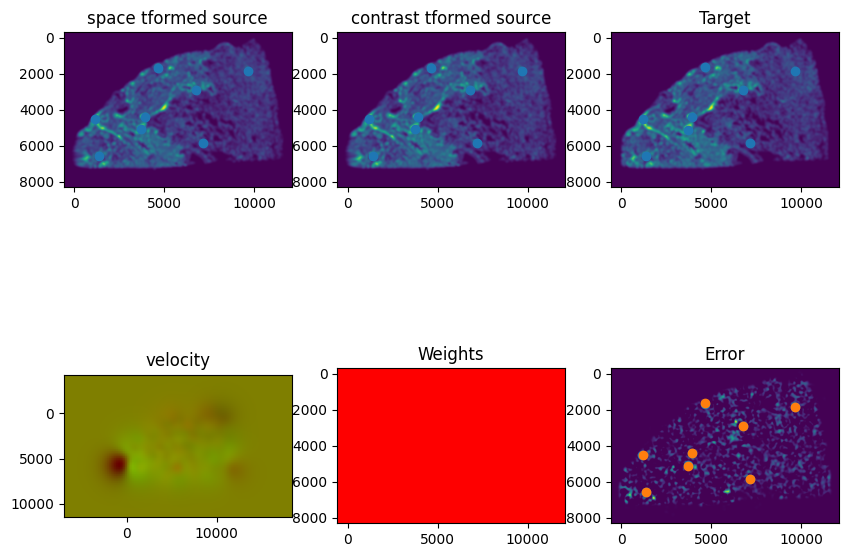

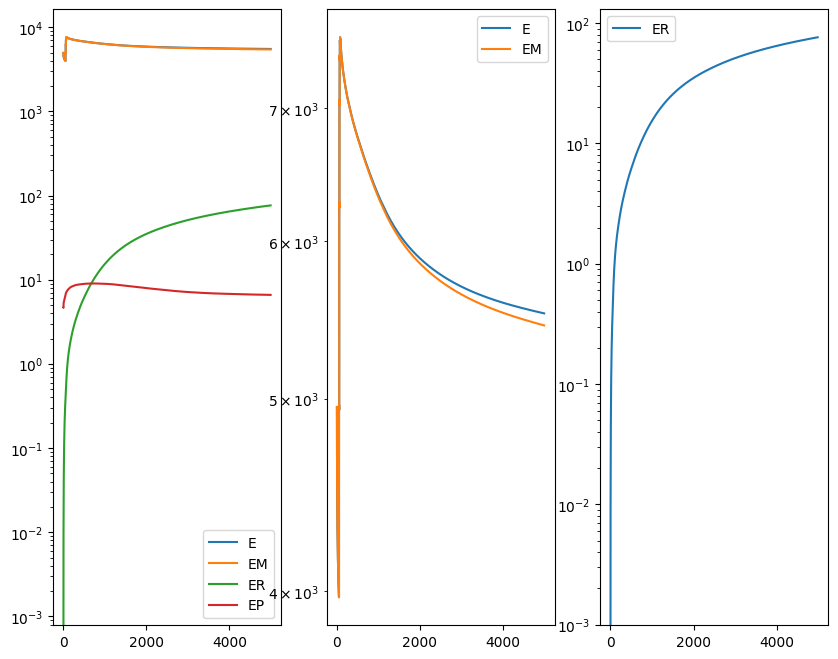

In [23]:
%%time

# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# keep all other parameters default
params = {'L':L,'T':T,
          'niter':5000,
          'pointsI':pointsI,
          'pointsJ':pointsJ,
          'device':device,
          'sigmaM':1.5,
          'sigmaB':1.0,
          'sigmaA':1.1,
          'epV': 100
          }

out = STa.LDDMM([YI,XI],I,[YJ,XJ],J,**params)

In [24]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

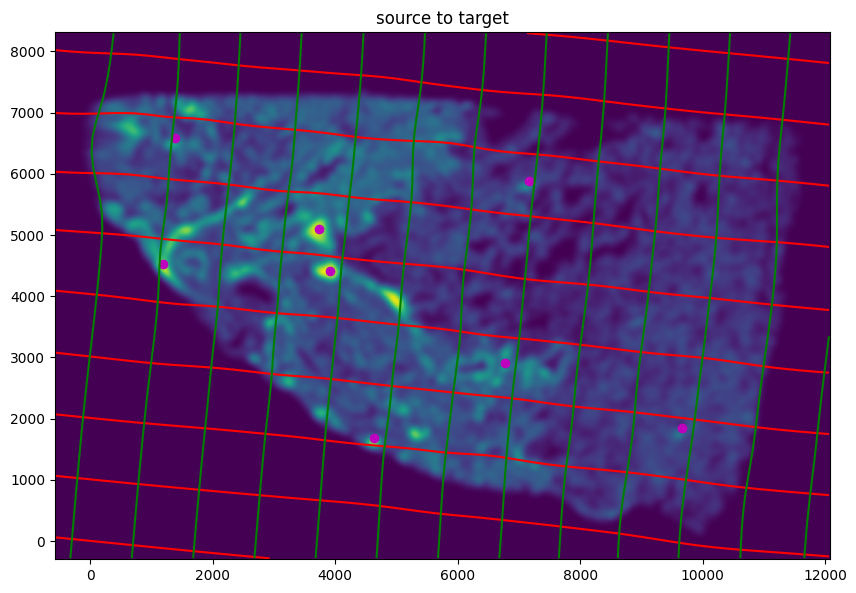

In [25]:
# apply transform
phii = STa.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = STa.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])
phipointsI = STa.transform_points_source_to_target(xv,v,A,pointsI)

#switch tensor from cuda to cpu for plotting with numpy
if phii.is_cuda:
    phii = phii.cpu()
if phiI.is_cuda:
    phiI = phiI.cpu()
if phipointsI.is_cuda:
    phipointsI = phipointsI.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.scatter(phipointsI[:,1].detach(),phipointsI[:,0].detach(),c="m")
ax.invert_yaxis()

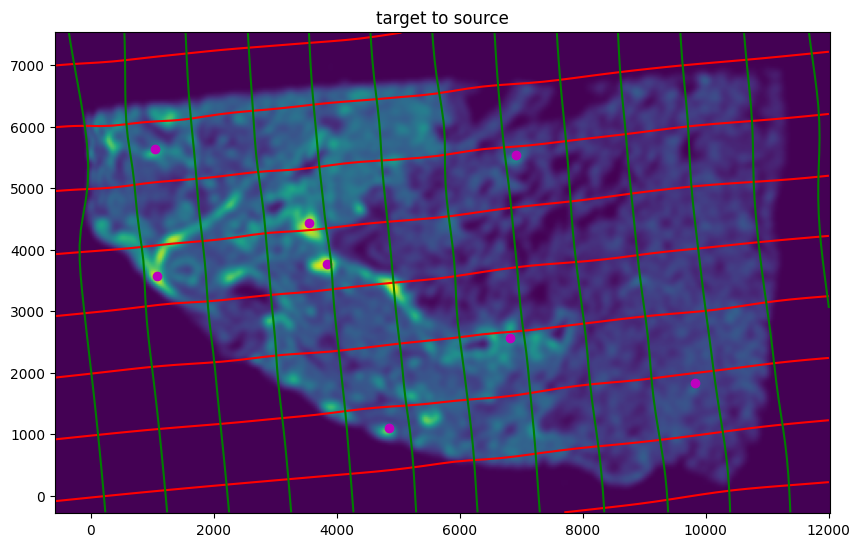

In [26]:
# transform is invertible
phi = STa.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
phiiJ = STa.transform_image_target_to_source(xv,v,A,[YJ,XJ],J,[YI,XI])
phiipointsJ = STa.transform_points_target_to_source(xv,v,A,pointsJ)

#switch tensor from cuda to cpu for plotting with numpy
if phi.is_cuda:
    phi = phi.cpu()
if phiiJ.is_cuda:
    phiiJ = phiiJ.cpu()
if phiipointsJ.is_cuda:
    phiipointsJ = phiipointsJ.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('target to source')
ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
ax.scatter(phiipointsJ[:,1].detach(),phiipointsJ[:,0].detach(),c="m")
ax.invert_yaxis()

In [27]:
# apply transform to original points of target to source
tpointsJ = STa.transform_points_target_to_source(xv,v,A, np.stack([yJ, xJ], 1))

#switch tensor from cuda to cpu for plotting with numpy
if tpointsJ.is_cuda:
    tpointsJ = tpointsJ.cpu()

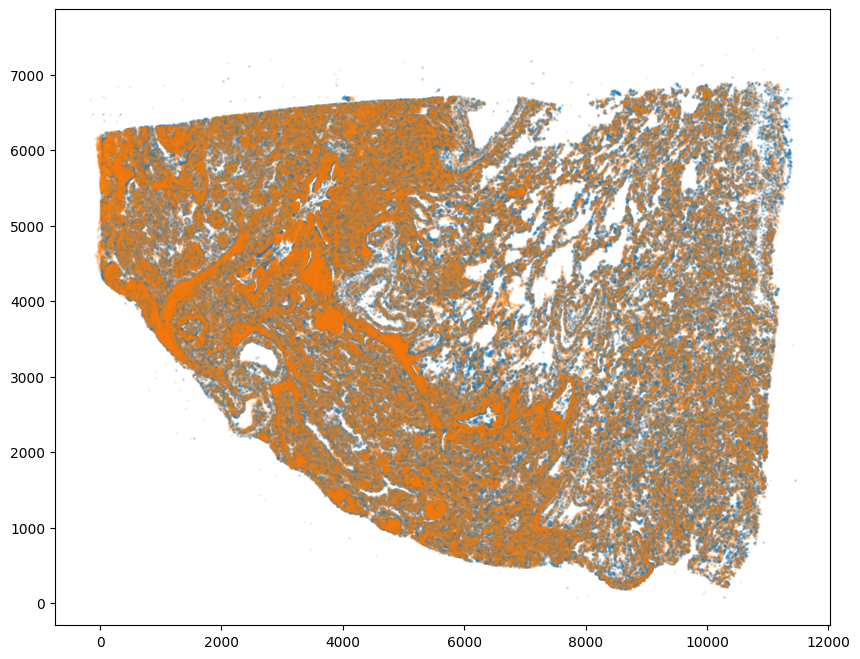

In [28]:
# plot results
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
ax.scatter(tpointsJ[:,1],tpointsJ[:,0],s=1,alpha=0.1) # also needs to plot as y,x not x,y

In [29]:
results = np.hstack((df2, tpointsJ.numpy()))

In [37]:
# Transform points from df2 (target) to df1 (source) space
tpointsJ = STa.transform_points_target_to_source(xv, v, A, np.stack([yJ, xJ], 1))
if tpointsJ.is_cuda:
    tpointsJ = tpointsJ.cpu()

# Transform points from df1 (source) to df2 (target) space
tpointsI = STa.transform_points_source_to_target(xv, v, A, np.stack([yI, xI], 1))
if tpointsI.is_cuda:
    tpointsI = tpointsI.cpu()


In [38]:
# Create output1.parquet (df2 data + coordinates mapped to df1 space)
df2_new = df2.copy()
df2_new['new_y'] = tpointsJ.numpy()[:, 0]  # Match the y,x ordering from your code
df2_new['new_x'] = tpointsJ.numpy()[:, 1]
df2_new.to_parquet("output1.parquet", engine="pyarrow", index=False)

# Create output2.parquet (df1 data + coordinates mapped to df2 space)
df1_new = df1.copy()
df1_new['new_y'] = tpointsI.numpy()[:, 0]  # Match the y,x ordering
df1_new['new_x'] = tpointsI.numpy()[:, 1]
df1_new.to_parquet("output2.parquet", engine="pyarrow", index=False)


In [40]:
dfN1 = pd.read_parquet('output1.parquet') 
dfN2 = pd.read_parquet('output2.parquet')

In [45]:
dfN1.sort_values(by="new_x").head(10)

cell_id  x_centroid   y_centroid  transcript_counts   
272136  odhhmgaa-1   31.097065  7633.416992                  0  \
272137  odhhodih-1   35.769787  7450.618652                  1   
46995   chffbcfg-1   38.535164  7444.853027                  3   
44547   cfdnjbod-1   34.043949  5624.683594               1966   
44549   cfdobdkn-1   32.396084  5638.165039                688   
511     aaghpanb-1   14.232666  7125.117676                680   
44548   cfdnpdlo-1   38.546837  5647.543945               1523   
46994   chfepjpi-1   23.530443  7119.334473                 89   
47003   chfgmdoo-1    9.384281  7055.674316                320   
952     aambhcpj-1   56.601341  5606.335938                497   

        control_probe_counts  genomic_control_counts  control_codeword_counts   
272136                     0                       0                        0  \
272137                     0                       0                        0   
46995                      0                       0                        0   
44547                      0                       0                        0   
44549                      0                       0                        0   
511                        0                       0                        0   
44548                      0                       0                        0   
46994                      0                       0                        0   
47003                      0                       0                        0   
952                        0                       0                        0   

        unassigned_codeword_counts  deprecated_codeword_counts  total_counts   
272136                           0                           0             0  \
272137                           0                           0             1   
46995                            0                           0             3   
44547                            0                           0          1966   
44549                            0                           1           689   
511                              0                           0           680   
44548                            0                           1          1524   
46994                            0                           0            89   
47003                            0                           1           321   
952                              0                           2           499   

         cell_area  nucleus_area  nucleus_count   
272136  186.946882     19.913907              1  \
272137   22.894220     22.894220              1   
46995    71.708128     56.761408              1   
44547   187.443601     80.694222              1   
44549   125.534380     11.650313              1   
511     103.227191     31.157814              1   
44548   104.220629     53.961721              1   
46994   212.234383     21.539532              1   
47003    25.332657     20.139688              1   
952      61.277033     48.678439              1   

                                      segmentation_method        new_y   
272136            Segmented by nucleus expansion of 5.0µm  6663.789092  \
272137            Segmented by nucleus expansion of 5.0µm  6480.983116   
46995                   Segmented by interior stain (18S)  6475.200796   
44547                   Segmented by interior stain (18S)  4605.061359   
44549                   Segmented by interior stain (18S)  4618.896182   
511     Segmented by boundary stain (ATP1A1+CD45+E-Cad...  6148.318206   
44548                   Segmented by interior stain (18S)  4628.862391   
46994                   Segmented by interior stain (18S)  6142.296496   
47003                   Segmented by interior stain (18S)  6075.964579   
952     Segmented by boundary stain (ATP1A1+CD45+E-Cad...  4587.208224   

             new_x  
272136 -165.352003  
272137 -126.609593  
46995  -123.908180  
44547   -81.122828  
44549   -79.636835  
511     

In [46]:
dfN2.sort_values(by="new_x").head(10)

cell_id  x_centroid   y_centroid  transcript_counts   
5207  aegphoah-1    6.205750  5327.309082                 40  \
5217  aehbjcog-1    8.105564  5314.507812                 45   
2751  acfmllnk-1    8.510295  5266.131836                 38   
2753  acfmpjap-1    8.967985  5301.534180                 27   
2755  acfnhfhb-1    8.857243  5290.566406                 16   
2864  achfkhkp-1    8.182842  5206.694824                 21   
2884  achjakjg-1    7.477694  5096.135254                 16   
2854  achcjhcb-1    8.150697  5105.685547                 24   
2756  acfnigkn-1    9.986779  5278.491211                 41   
2883  achipbjh-1    7.937817  5068.569824                 14   

      control_probe_counts  genomic_control_counts  control_codeword_counts   
5207                     0                       0                        0  \
5217                     0                       0                        0   
2751                     1                       0                        0   
2753                     0                       0                        0   
2755                     0                       0                        0   
2864                     0                       0                        0   
2884                     0                       0                        0   
2854                     0                       0                        0   
2756                     0                       0                        0   
2883                     0                       0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts   
5207                           0                           0            40  \
5217                           0                           0            45   
2751                           0                           0            39   
2753                           0                           0            27   
2755                           0                           0            16   
2864                           0                           0            21   
2884                           0                           0            16   
2854                           0                           0            24   
2756                           0                           0            41   
2883                           0                           0            14   

       cell_area  nucleus_area  nucleus_count   
5207   94.737816      8.579688              1  \
5217  116.006410     13.817813              1   
2751  200.403445     28.629064              1   
2753  148.338287     28.493595              1   
2755   72.791878     14.088751              1   
2864  114.516254     13.366250              1   
2884   70.308284      8.128125              1   
2854   83.855159     20.817032              1   
2756  119.664067     19.417188              1   
2883   92.750941      7.586250              1   

                          segmentation_method        new_y      new_x  
5207  Segmented by nucleus expansion of 5.0µm  6339.161191  82.712659  
5217  Segmented by nucleus expansion of 5.0µm  6326.272382  86.363709  
2751  Segmented by nucleus expansion of 5.0µm  6277.759178  88.012451  
2753  Segmented by nucleus expansion of 5.0µm  6313.239462  88.146775  
2755  Segmented by nucleus expansion of 5.0µm  6302.246725  88.161326  
2864  Segmented by nucleus expansion of 5.0µm  6218.171588  88.503287  
2884  Segmented by nucleus expansion of 5.0µm  6107.315979  89.053012  
2854  Segmented by nucleus expansion of 5.0µm  6116.866682  90.014140  
2756  Segmented by nucleus expansion of 5.0µm  6290.103265  90.364964  
2883  Segmented by nucleus expansion of 5.0µm  6079.761973  92.155785

In [30]:
columns = list(df1.columns) + ["New_X"] + ["New_Y"]  # Adjust column names as needed
df_results = pd.DataFrame(results, columns=columns)

# Save to a Parquet file
df_results.to_parquet("output1.parquet", engine="pyarrow", index=False)

In [ ]:
df1New = pd.read_parquet('output1.parquet')

In [33]:
df1New.sort_values(by="New_X").head(10)

cell_id   x_centroid  y_centroid  transcript_counts   
278264  oijohphb-1  7540.033203  330.762329                  0  \
269299  obccaefg-1  7724.009277  319.896118                302   
276882  ohhjghhp-1  9553.232422  107.154205                  0   
276883  ohhkbgbf-1  9574.993164  134.711487                  0   
269372  obdcjjhg-1  8339.108398  341.307495                142   
269379  obdeliep-1  8325.342773  346.545044                466   
36488   bohpcpdn-1  8333.306641  347.493408                404   
36490   bohpefmh-1  8340.842773  348.026306                342   
36485   bohokaia-1  8368.748047  345.648834                886   
269380  obdenkmn-1  8318.497070  352.069031                377   

        control_probe_counts  genomic_control_counts  control_codeword_counts   
278264                     0                       0                        0  \
269299                     0                       0                        0   
276882                     0                       0                        0   
276883                     0                       0                        0   
269372                     0                       0                        0   
269379                     0                       0                        0   
36488                      0                       0                        0   
36490                      0                       0                        0   
36485                      0                       0                        0   
269380                     0                       0                        0   

        unassigned_codeword_counts  deprecated_codeword_counts  total_counts   
278264                           0                           0             0  \
269299                           0                           0           302   
276882                           0                           0             0   
276883                           0                           0             0   
269372                           0                           0           142   
269379                           0                           1           467   
36488                            0                           2           406   
36490                            0                           1           343   
36485                            0                           3           889   
269380                           0                           0           377   

         cell_area  nucleus_area  nucleus_count   
278264  117.180473      6.773438              1  \
269299   41.543752     32.196407              1   
276882  127.024536      6.863750              1   
276883  123.547504      7.766875              1   
269372   43.575783     20.636407              1   
269379   90.854378     61.593127              1   
36488    61.367346     41.363127              1   
36490    60.012658     38.653751              1   
36485   145.448287     61.096408              2   
269380   75.817347     36.576564              1   

                                      segmentation_method       New_X   
278264            Segmented by nucleus expansion of 5.0µm   77.562548  \
269299                  Segmented by interior stain (18S)   88.383456   
276882            Segmented by nucleus expansion of 5.0µm  123.506383   
276883            Segmented by nucleus expansion of 5.0µm  153.381978   
269372                  Segmented by interior stain (18S)  181.941777   
269379                  Segmented by interior stain (18S)  185.590656   
36488   Segmented by boundary stain (ATP1A1+CD45+E-Cad...  187.455098   
36490   Segmented by boundary stain (ATP1A1+CD45+E-Cad...  188.854665   
36485   Segmented by boundary stain (ATP1A1+CD45+E-Cad...  189.744703   
269380                  Segmented by interior stain (18S)  190.324233   

              New_Y  
278264  7840.992499  
269299  8034.039965  
276882  9923.649668  
276883  9943.141949  
269372  8671.720385  
269379  8656.